## Analysis taken from <a href="https://onlinecourses.science.psu.edu/stat501/node/295/">Stats 501</a>


One piece of this bothers me, namely that the MSR (<a href="https://www.britannica.com/science/mean-square-due-to-regression">Mean Square Due to Regressions</a>) is independent of Mean Square Error of the full model, and is chi-squared distributed with $(p_F - p_R)$ degrees of freedom.   Since I can't figure out how to derive it, lets test it.

In [38]:
%matplotlib inline
from __future__ import print_function
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import scipy as sc
import random
import matplotlib.pyplot as plt


In [41]:
slopeActual = 10.5
interceptActual = 5
noiseAmp = 1

def generateValues(sampleSize, slope, intercept, noiseAmp):    
    output = []
    for i in range(sampleSize):
        x = random.random()*3
        y = slope*x+intercept
        output.append((x+random.gauss(0,noiseAmp), y+random.gauss(0,noiseAmp)))
    
    #zip converts a k long list of n-tuples into a n long list of k tuples
    data = map(list, zip(*output))
    return (np.array(data[0]),np.array(data[1]))


In [96]:
(x,y) = generateValues(50, 5,1,0.2)

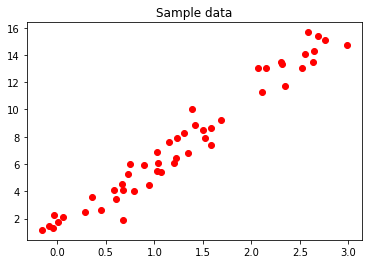

In [97]:
plt.plot(x,y, 'ro')
plt.title("Sample data")
plt.show()

#### Performing the linear regression

In [98]:
regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1,1),y.reshape(-1,1))
params = regr.get_params()
y_predicted = regr.predict(x.reshape(-1,1))
m = regr.coef_[0][0]
b = regr.intercept_[0]

y_bar = y.mean()
print("m = {:.2f}; b = {:.2f}".format(m,b))
print("y_bar = {:.2f}".format(y_bar))

m = 4.94; b = 1.21
y_bar = 7.64


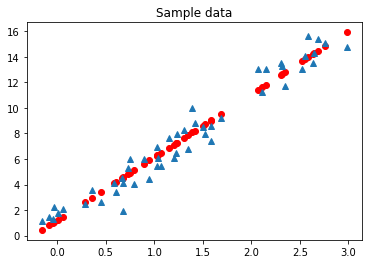

In [99]:
plt.plot(x, y_predicted[:,0], 'ro')
plt.plot(x,y,'^')
plt.title("Sample data")
plt.show()

#### F-statistic measures

In [106]:
SSE_R = ((y-y_bar)**2).sum()
SSE_F = ((y-y_predicted[:,0])**2).sum()
F_Statistic = (SSE_R - SSE_F)/(SSE_F/49)
print("SSE_R = {:.2f}; SSE_F = {:.2f}; F-Statistic = {:.2f}".format(SSE_R, SSE_F, F_Statistic))

SSE_R = 965.72; SSE_F = 43.80; F-Statistic = 1031.26
